# KNN model

### Import libraries

In [6]:
### import libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

import folium
from folium.plugins import HeatMap

from geopy.distance import geodesic


### Data Processing

In [7]:
data = pd.read_csv('./data/data_train.csv')
data

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60970,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60971,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60972,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60973,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_3_3,-115.000000


Normalize data using MinMaxScaler for KNN

In [8]:
# features to normalize
features = ["rssi_value", "delay_1", "delay_2", "delay_3"]

scaler = MinMaxScaler()
scaler.fit(data[features])

data.loc[:, features] = scaler.transform(data[features])

data

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,0.571429,0.428571,0.285714,-8.055786,-34.951505,True,rssi_1_1,0.151583
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_1_1,0.132261
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,0.571429,0.428571,0.285714,-8.055506,-34.951693,True,rssi_1_1,0.165501
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,0.428571,1.000000,0.285714,-8.050390,-34.959630,False,rssi_1_1,0.336723
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,0.571429,0.428571,0.285714,-8.055380,-34.951736,True,rssi_1_1,0.083153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60970,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.095462
60971,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.095462
60972,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.095462
60973,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,0.571429,0.428571,0.285714,-8.055380,-34.951736,True,rssi_3_3,0.008008


Create dataframe with necessary features

In [9]:
knn_features = ["rssi_value", "delay_1", "delay_2", "delay_3", "lon_y", "lat_y"]

knn_df = data.copy()
knn_df = knn_df[knn_features]

knn_df

,rssi_value,delay_1,delay_2,delay_3,lon_y,lat_y
0,0.151583,0.571429,0.428571,0.285714,-34.951505,-8.055786
1,0.132261,0.571429,0.428571,0.285714,-34.951608,-8.055784
2,0.165501,0.571429,0.428571,0.285714,-34.951693,-8.055506
3,0.336723,0.428571,1.000000,0.285714,-34.959630,-8.050390
4,0.083153,0.571429,0.428571,0.285714,-34.951736,-8.055380
...,...,...,...,...,...,...
60970,0.095462,0.571429,0.428571,0.285714,-34.951608,-8.055784
60971,0.095462,0.571429,0.428571,0.285714,-34.951608,-8.055784
60972,0.095462,0.571429,0.428571,0.285714,-34.951608,-8.055784
60973,0.008008,0.571429,0.428571,0.285714,-34.951736,-8.055380


### Model training and testing

In [10]:
# X and y features
knn_X = knn_df.drop(columns=["lon_y", "lat_y"])
knn_y = knn_df[["lon_y", "lat_y"]]

# data traind and test split
X_train, X_test, y_train, y_test = train_test_split(knn_X, knn_y, test_size=0.1, random_state=42)

# KNN model training
knn = KNeighborsRegressor(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50)

In [11]:
# KNN model prediction
predicted_location = knn.predict(X_test)
predicted_location

array([[-34.9476038 ,  -8.050217  ],
       [-34.9534708 ,  -8.0548134 ],
       [-34.9516659 ,  -8.05559134],
       ...,
       [-34.9475766 ,  -8.0473838 ],
       [-34.951736  ,  -8.05538   ],
       [-34.95133788,  -8.0557032 ]])

### Model evaluation
Metrics: Max error, min error, standard diviation, mean error, median

In [12]:
# calculating erros in meters
errors_in_meters = []
for real, pred in zip(y_test.values, predicted_location):
    real_coords = (real[1], real[0])  # (lat, lon)
    pred_coords = (pred[1], pred[0])  # (lat, lon)
    error_distance = geodesic(real_coords, pred_coords).meters
    errors_in_meters.append(error_distance)

# converting to numpy
errors_in_meters = np.array(errors_in_meters)

mean_error = errors_in_meters.mean()
std_error = errors_in_meters.std()
max_error = errors_in_meters.max()
min_error = errors_in_meters.min()
med_error = np.median(errors_in_meters)

print(f'Mean Error: {mean_error:.2f} meters')
print(f'Std Error: {std_error:.2f} meters')
print(f'Max Error: {max_error:.2f} meters')
print(f'Min Error: {min_error:.2f} meters')
print(f'Median Error: {med_error:.2f} meters')


Mean Error: 21.94 meters
Std Error: 32.18 meters
Max Error: 284.44 meters
Min Error: 0.00 meters
Median Error: 9.11 meters


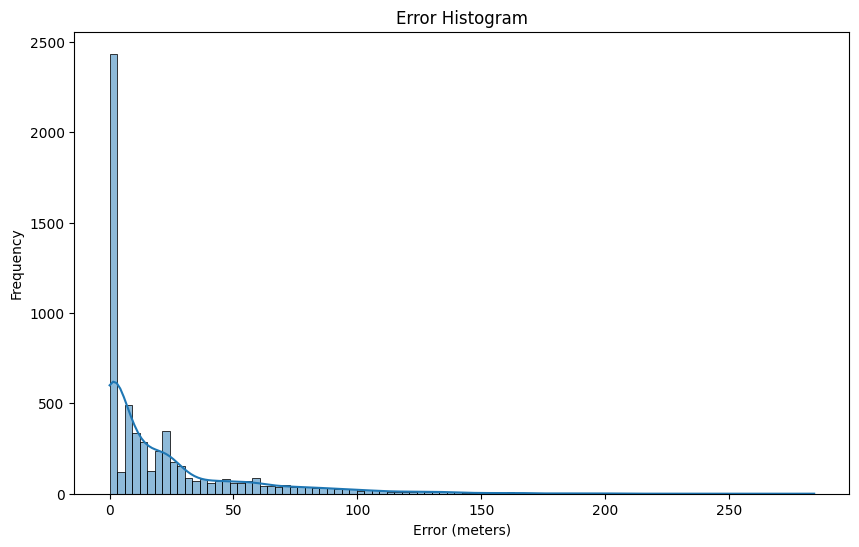

In [13]:
### error histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(errors_in_meters, kde=True)
plt.title('Error Histogram')
plt.xlabel('Error (meters)')
plt.ylabel('Frequency')
plt.show()

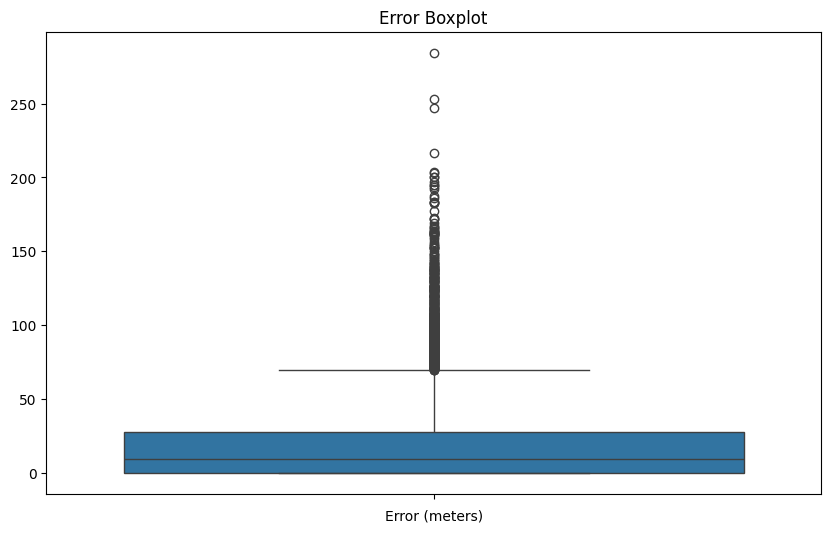

In [14]:
### error boxplot plot
plt.figure(figsize=(10, 6))
sns.boxplot(errors_in_meters)
plt.title('Error Boxplot')
plt.xlabel('Error (meters)')
plt.show()

### Map Visualization

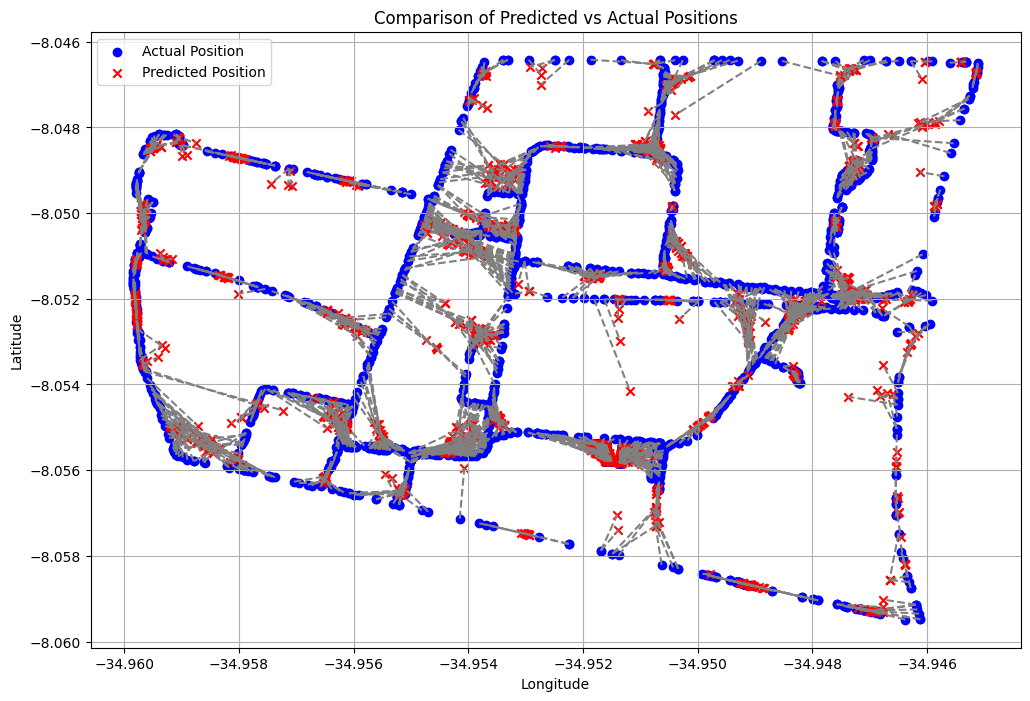

In [15]:
true_lat = y_test['lat_y'].values
true_lon = y_test['lon_y'].values

pred_lat = predicted_location[:, 1]
pred_lon = predicted_location[:, 0]

plt.figure(figsize=(12, 8))
plt.scatter(true_lon, true_lat, color='blue', label='Actual Position')
plt.scatter(pred_lon, pred_lat, color='red', marker='x', label='Predicted Position')

for i in range(len(true_lat)):
    plt.plot([true_lon[i], pred_lon[i]], [true_lat[i], pred_lat[i]], 'gray', linestyle='--')

plt.title('Comparison of Predicted vs Actual Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

Simulate for the test dataset (not oficial)

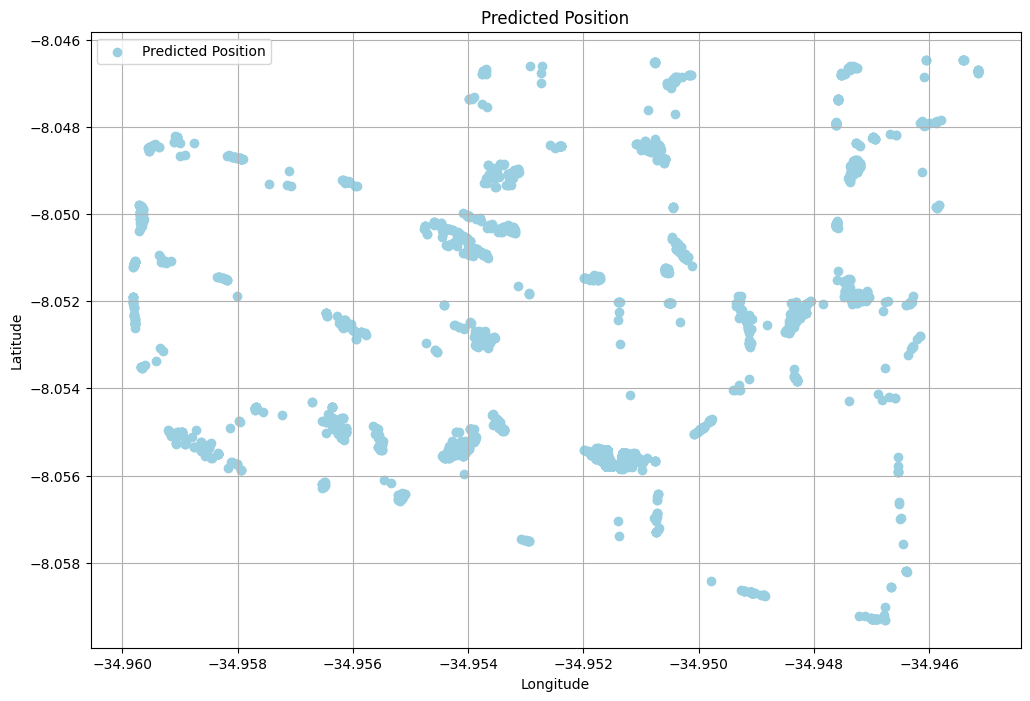

In [16]:
### make the test for the test data

data_test = pd.read_csv('./data/data_test.csv')

data_test.loc[:, features] = scaler.transform(data_test[features])

features = ["rssi_value", "delay_1", "delay_2", "delay_3"]

fingerprint_test = data_test.copy()
fingerprint_test = fingerprint_test[features]

### KNN model prediction
predicted_location_test = knn.predict(fingerprint_test)
predicted_location_test

### create a dataframe with the predicted location
predicted_location_df = pd.DataFrame(predicted_location_test, columns=["lon_y", "lat_y"])

### map visualization
plt.figure(figsize=(12, 8))
plt.scatter(pred_lon, pred_lat, color='#99cfe0', label='Predicted Position')
plt.title('Predicted Position')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
### make a map of the BTS
map = folium.Map(location=[-23.5489, -46.6388], zoom_start=12)

# Add a heatmap of the BTS
heatmap_data = predicted_location_test[:, [1, 0]]
HeatMap(heatmap_data).add_to(map)

map

## Generate for the test file
Re train the model for the data test file (excluding the previous 10% data used for test)

In [18]:
data_tested = pd.concat([X_test, y_test], axis=1)

data_train = pd.read_csv('./data/data_train_complete.csv')

## removed tested data from data_train
data_train = data_train[~data_train.isin(data_tested)].dropna()
data_train

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60380,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60381,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60382,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60383,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_3_3,-115.000000


In [19]:
## retrain KNN model
selected_features = ["rssi_value", "delay_1", "delay_2", "delay_3", "lon_y", "lat_y"]
scaler_features = ["rssi_value", "delay_1", "delay_2", "delay_3"]

scaler = MinMaxScaler()
scaler.fit(data_train[scaler_features])

data_train.loc[:, scaler_features] = scaler.transform(data_train[scaler_features])

data_train

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,0.571429,0.428571,0.285714,-8.055786,-34.951505,True,rssi_1_1,0.259352
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_1_1,0.226294
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,0.571429,0.428571,0.285714,-8.055506,-34.951693,True,rssi_1_1,0.283167
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,0.428571,1.000000,0.285714,-8.050390,-34.959630,False,rssi_1_1,0.576120
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,0.571429,0.428571,0.285714,-8.055380,-34.951736,True,rssi_1_1,0.142272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60380,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.163332
60381,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.163332
60382,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,0.571429,0.428571,0.285714,-8.055784,-34.951608,True,rssi_3_3,0.163332
60383,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,0.571429,0.428571,0.285714,-8.055380,-34.951736,True,rssi_3_3,0.013702


In [20]:
data_train = data_train[selected_features]
data_train

,rssi_value,delay_1,delay_2,delay_3,lon_y,lat_y
0,0.259352,0.571429,0.428571,0.285714,-34.951505,-8.055786
1,0.226294,0.571429,0.428571,0.285714,-34.951608,-8.055784
2,0.283167,0.571429,0.428571,0.285714,-34.951693,-8.055506
3,0.576120,0.428571,1.000000,0.285714,-34.959630,-8.050390
4,0.142272,0.571429,0.428571,0.285714,-34.951736,-8.055380
...,...,...,...,...,...,...
60380,0.163332,0.571429,0.428571,0.285714,-34.951608,-8.055784
60381,0.163332,0.571429,0.428571,0.285714,-34.951608,-8.055784
60382,0.163332,0.571429,0.428571,0.285714,-34.951608,-8.055784
60383,0.013702,0.571429,0.428571,0.285714,-34.951736,-8.055380


In [21]:
X_train_data = data_train.drop(columns=["lon_y", "lat_y"])
y_train_data = data_train[["lon_y", "lat_y"]]

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_data, y_train_data)

KNeighborsRegressor()

In [22]:
## predict values for data_test

data_test = pd.read_csv('./data/data_test.csv')

selected_features = ["rssi_value", "delay_1", "delay_2", "delay_3"]

## normalize data
data_test.loc[:, scaler_features] = scaler.transform(data_test[scaler_features])
data_test = data_test[selected_features]
print(data_test)

## predict
predicted_location = knn.predict(data_test)
print(predicted_location)

## save predicted values into test data
data_test_complete = pd.read_csv('./data/data_test.csv')
data_test_complete["lon_y"] = predicted_location[:, 0]
data_test_complete["lat_y"] = predicted_location[:, 1]

data_test_complete

       rssi_value   delay_1   delay_2   delay_3
0        0.013702  0.571429  0.428571  0.285714
1        0.013702  0.571429  0.428571  0.285714
2        0.013702  0.571429  0.428571  0.285714
3        0.013702  0.571429  0.428571  0.285714
4        0.013702  0.571429  0.428571  0.285714
...           ...       ...       ...       ...
26131    0.400391  0.000000  0.571429  0.571429
26132    0.394302  0.000000  0.571429  0.571429
26133    0.418987  0.000000  0.571429  0.571429
26134    0.463299  0.000000  0.571429  0.714286
26135    0.463299  0.000000  0.571429  0.714286

[26136 rows x 4 columns]
[[-34.951728  -8.055605]
 [-34.951728  -8.055605]
 [-34.951728  -8.055605]
 ...
 [-34.952788  -8.04642 ]
 [-34.950782  -8.046468]
 [-34.950782  -8.046468]]


,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value,lon_y,lat_y
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,0,5.0,3.0,2.0,rssi_1_1,-115.0000,-34.951728,-8.055605
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,3,5.0,3.0,2.0,rssi_1_1,-115.0000,-34.951728,-8.055605
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8,5.0,3.0,2.0,rssi_1_1,-115.0000,-34.951728,-8.055605
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,10,5.0,3.0,2.0,rssi_1_1,-115.0000,-34.951728,-8.055605
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,12,5.0,3.0,2.0,rssi_1_1,-115.0000,-34.951728,-8.055605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26131,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9672,1.0,4.0,4.0,rssi_3_3,-97.2200,-34.952784,-8.046420
26132,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9674,1.0,4.0,4.0,rssi_3_3,-97.5000,-34.952462,-8.046420
26133,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9675,1.0,4.0,4.0,rssi_3_3,-96.3650,-34.952788,-8.046420
26134,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9677,1.0,4.0,5.0,rssi_3_3,-94.3275,-34.950782,-8.046468


In [23]:
submission = data_test_complete[["ponto_id", "lon_y", "lat_y"]]
submission.rename(columns={"lon_y": "lon_pred", "lat_y": "lat_pred"}, inplace=True)

/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_1175/256282035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.rename(columns={"lon_y": "lon_pred", "lat_y": "lat_pred"}, inplace=True)


In [24]:
submission.to_csv('./data/Resultados_Equipe1_Metodo_KNN.csv', index=False)

In [25]:
submission

,ponto_id,lon_pred,lat_pred
0,0,-34.951728,-8.055605
1,3,-34.951728,-8.055605
2,8,-34.951728,-8.055605
3,10,-34.951728,-8.055605
4,12,-34.951728,-8.055605
...,...,...,...
26131,9672,-34.952784,-8.046420
26132,9674,-34.952462,-8.046420
26133,9675,-34.952788,-8.046420
26134,9677,-34.950782,-8.046468


Visualize the predict coordinates for the test dataset

[-34.951728 -34.951728 -34.951728 ... -34.952788 -34.950782 -34.950782]


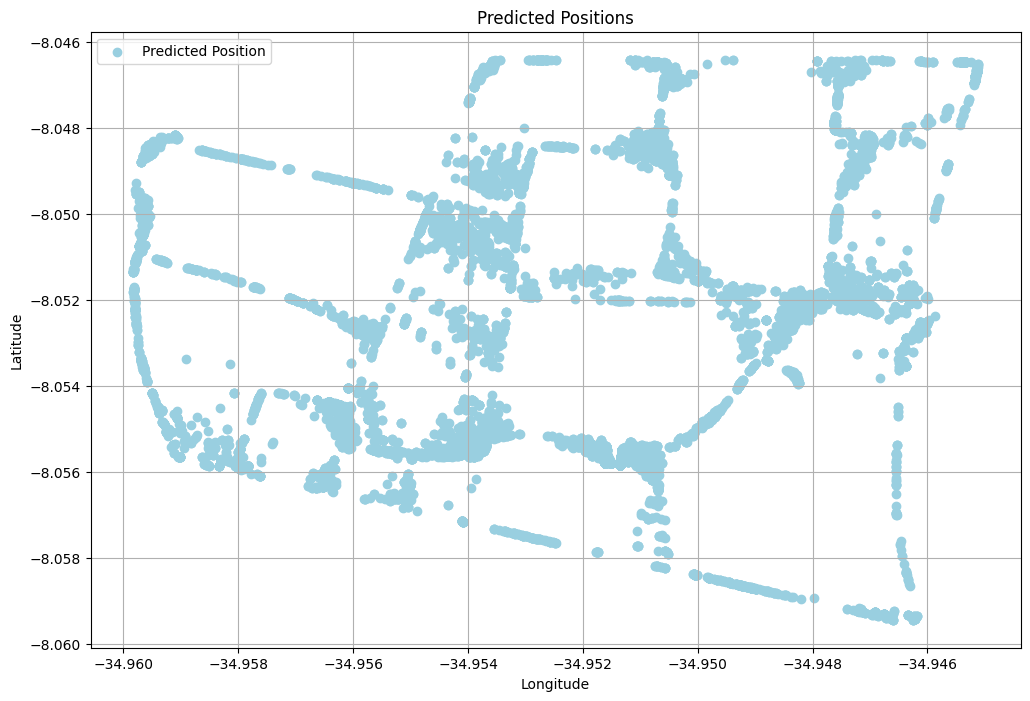

In [26]:
## make the predicted map

pred_lat = submission["lat_pred"].values
pred_lon = submission["lon_pred"].values

print(pred_lon)

plt.figure(figsize=(12, 8))
plt.scatter(pred_lon, pred_lat, color='#99cfe0', label='Predicted Position')

plt.title('Predicted Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
test = pd.read_csv("./data/Resultados_Equipe1_Metodo_KNN.csv")
test

,ponto_id,lon_pred,lat_pred
0,0,-34.951728,-8.055605
1,3,-34.951728,-8.055605
2,8,-34.951728,-8.055605
3,10,-34.951728,-8.055605
4,12,-34.951728,-8.055605
...,...,...,...
26131,9672,-34.952784,-8.046420
26132,9674,-34.952462,-8.046420
26133,9675,-34.952788,-8.046420
26134,9677,-34.950782,-8.046468


In [28]:
### visualize the predicted location as a heatmap

predicted_location_test = test[["lon_pred", "lat_pred"]].values

### make a map of the BTS
map = folium.Map(location=[-23.5489, -46.6388], zoom_start=12)

# Add a heatmap of the BTS
heatmap_data = predicted_location_test[:, [1, 0]]
HeatMap(heatmap_data).add_to(map)

map

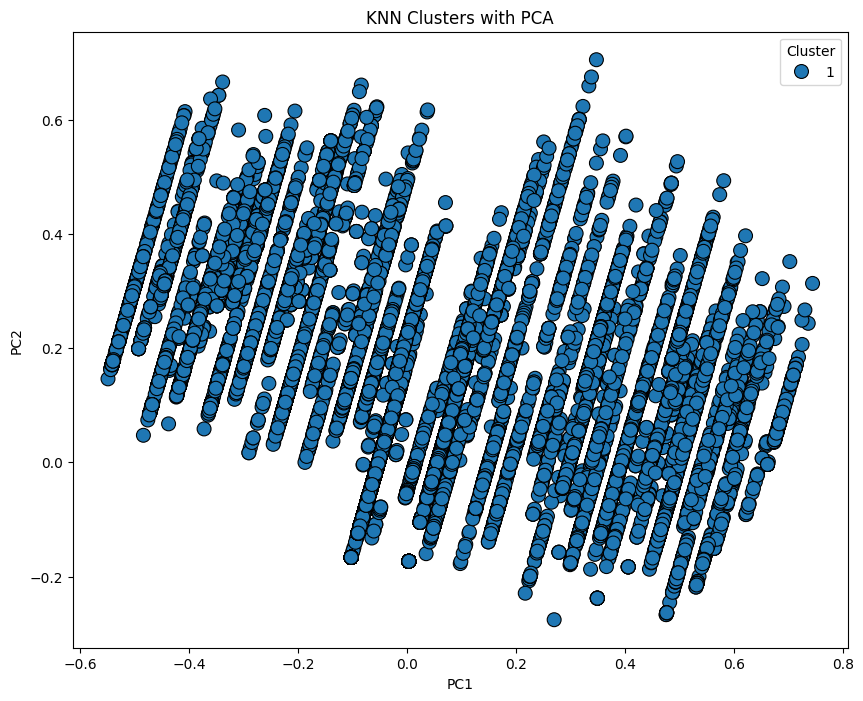

In [32]:
# PCA technique to analyse clustering
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# train KNN and obtain clusters
knn.fit(X_train_pca, y_train)
y_train_pred = knn.predict(X_train_pca)

# convert the data to a datafrane
df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_train_pred.argmax(axis=1) if y_train_pred.ndim > 1 else y_train_pred

# plot graph
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='tab10', s=100, edgecolor='k')
plt.title('KNN Clusters with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()